In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-00s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# checking basic integrity

In [4]:
data.shape

(5872, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
track               5872 non-null object
artist              5872 non-null object
uri                 5872 non-null object
danceability        5872 non-null float64
energy              5872 non-null float64
key                 5872 non-null int64
loudness            5872 non-null float64
mode                5872 non-null int64
speechiness         5872 non-null float64
acousticness        5872 non-null float64
instrumentalness    5872 non-null float64
liveness            5872 non-null float64
valence             5872 non-null float64
tempo               5872 non-null float64
duration_ms         5872 non-null int64
time_signature      5872 non-null int64
chorus_hit          5872 non-null float64
sections            5872 non-null int64
target              5872 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 871.8+ KB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# checking for duplicate rows

In [9]:
data['uri'].nunique(), 

(5855,)

In [10]:
data['uri'].value_counts()


49bUJjrC16NgnrgGS75Yan    2
6pWzCKTrKrwbUPzY8RLCoP    2
561jH07mF1jHuk7KlaeF0s    2
5YSW99IUAIiAj243jF7PBO    2
3XVBdLihbNbxUwZosxcGuJ    2
                         ..
2I8R6q0jiDVPslenoohZL2    1
3JVI710efRiB7comD33vD1    1
4MADGFU7nsX9wF1MoNhaTW    1
3VBmDO3nmzXWzxgAhRFO38    1
5TV96lkS2NF6kzILjORzLs    1
Name: uri, Length: 5855, dtype: int64

In [11]:
data['uri'].value_counts().unique() 

array([2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 49bUJjrC16NgnrgGS75Yan    True
 6pWzCKTrKrwbUPzY8RLCoP    True
 561jH07mF1jHuk7KlaeF0s    True
 5YSW99IUAIiAj243jF7PBO    True
 3XVBdLihbNbxUwZosxcGuJ    True
 0t9Jd84JnsV8HRMaQzHUom    True
 0Uhnzk5zI46IRlQ04LNOtc    True
 3f3omU8n47Mqyab5nCaGyT    True
 4gGYiGsxhPYpsGIttWLwlT    True
 6NvRxjfYkkT2SpirAlmsjH    True
 77FULy278MulVvGWS8BfK7    True
 7Kpqjspw4Y7HrvItIRcBiW    True
 1qHRFZE8qykNXYZadzmi1m    True
 1mJ05BN0So26a14iib85aI    True
 2aIdVb8v9KTpEZnftkz2mD    True
 7uKcScNXuO3MWw6LowBjW1    True
 4TbNLKRLKlxZDlS0pu7Lsy    True
 Name: uri, dtype: bool>, (17,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['49bUJjrC16NgnrgGS75Yan',
 '6pWzCKTrKrwbUPzY8RLCoP',
 '561jH07mF1jHuk7KlaeF0s',
 '5YSW99IUAIiAj243jF7PBO',
 '3XVBdLihbNbxUwZosxcGuJ',
 '0t9Jd84JnsV8HRMaQzHUom',
 '0Uhnzk5zI46IRlQ04LNOtc',
 '3f3omU8n47Mqyab5nCaGyT',
 '4gGYiGsxhPYpsGIttWLwlT',
 '6NvRxjfYkkT2SpirAlmsjH',
 '77FULy278MulVvGWS8BfK7',
 '7Kpqjspw4Y7HrvItIRcBiW',
 '1qHRFZE8qykNXYZadzmi1m',
 '1mJ05BN0So26a14iib85aI',
 '2aIdVb8v9KTpEZnftkz2mD',
 '7uKcScNXuO3MWw6LowBjW1',
 '4TbNLKRLKlxZDlS0pu7Lsy']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(5838, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 0 to 5871
Data columns (total 19 columns):
track               5838 non-null object
artist              5838 non-null object
uri                 5838 non-null object
danceability        5838 non-null float64
energy              5838 non-null float64
key                 5838 non-null int64
loudness            5838 non-null float64
mode                5838 non-null int64
speechiness         5838 non-null float64
acousticness        5838 non-null float64
instrumentalness    5838 non-null float64
liveness            5838 non-null float64
valence             5838 non-null float64
tempo               5838 non-null float64
duration_ms         5838 non-null int64
time_signature      5838 non-null int64
chorus_hit          5838 non-null float64
sections            5838 non-null int64
target              5838 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 912.2+ KB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (5838, 19)
no. of unique rows 5838


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

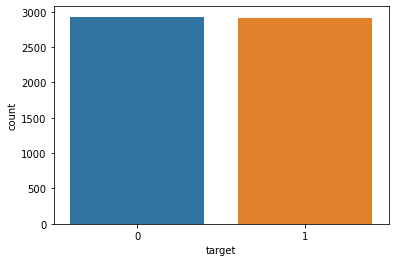

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') # target is perfectly balanced and have correct values(0,1)

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 0 to 5871
Data columns (total 4 columns):
danceability    5838 non-null float64
energy          5838 non-null float64
key             5838 non-null int64
loudness        5838 non-null float64
dtypes: float64(3), int64(1)
memory usage: 388.0 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()


,danceability,energy,key,loudness
count,5838.000000,5838.000000,5838.000000,5838.000000
mean,0.542615,0.694878,5.277321,-7.456585
std,0.190097,0.238059,3.564622,5.112946
min,0.058800,0.000348,0.000000,-47.327000
25%,0.415250,0.567000,2.000000,-8.322500
50%,0.555000,0.745000,5.000000,-6.047000
75%,0.681000,0.885000,8.000000,-4.560000
max,0.986000,0.999000,11.000000,1.137000


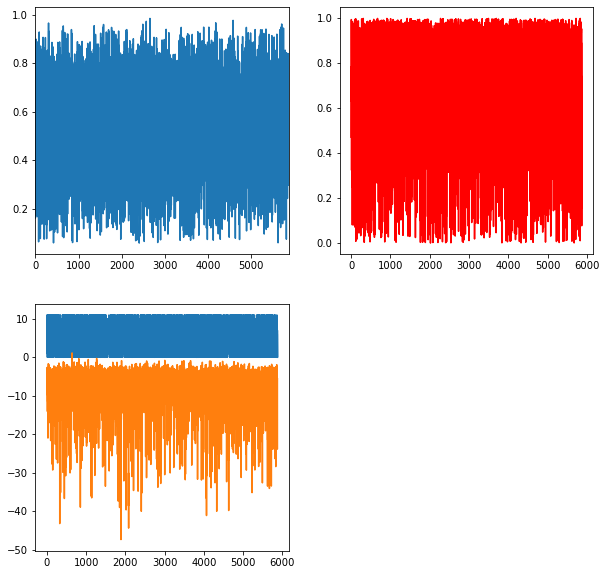

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])


#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([642], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(5837, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 0 to 5871
Data columns (total 5 columns):
mode                5837 non-null int64
speechiness         5837 non-null float64
acousticness        5837 non-null float64
instrumentalness    5837 non-null float64
liveness            5837 non-null float64
dtypes: float64(4), int64(1)
memory usage: 273.6 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,5837.000000,5837.000000,5837.000000,5837.000000,5837.000000
mean,0.645194,0.092338,0.214452,0.151806,0.196478
std,0.478495,0.094997,0.296907,0.302134,0.162280
min,0.000000,0.022400,0.000000,0.000000,0.019300
25%,0.000000,0.036200,0.004470,0.000000,0.093800
50%,1.000000,0.052700,0.060300,0.000022,0.131000
75%,1.000000,0.107000,0.312000,0.048900,0.264000
max,1.000000,0.950000,0.996000,0.998000,0.987000


<AxesSubplot:xlabel='mode', ylabel='count'>

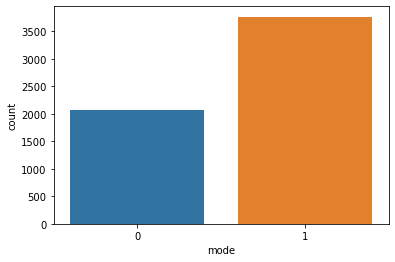

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 0 to 5871
Data columns (total 6 columns):
valence           5837 non-null float64
tempo             5837 non-null float64
duration_ms       5837 non-null int64
time_signature    5837 non-null int64
chorus_hit        5837 non-null float64
sections          5837 non-null int64
dtypes: float64(3), int64(3)
memory usage: 479.2 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,5837.000000,5837.000000,5.837000e+03,5837.000000,5837.000000,5837.000000
mean,0.482029,121.622630,2.583411e+05,3.913826,40.775478,11.058592
std,0.254444,30.181238,1.399215e+05,0.405086,20.272620,5.772948
min,0.000000,46.755000,1.592000e+04,0.000000,0.000000,1.000000
25%,0.278000,96.986000,2.067470e+05,4.000000,27.557920,9.000000
50%,0.485000,119.999000,2.382670e+05,4.000000,36.065390,10.000000
75%,0.686000,141.495000,2.794270e+05,4.000000,47.989250,12.000000
max,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((5837, 15), (5837,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
7,instrumentalness,1665.668687,1.463422e-320
0,danceability,1564.602122,2.316445e-303
3,loudness,806.565821,2.668464e-166
9,valence,508.747987,4.425443e-108
6,acousticness,314.622040,1.324320e-68
12,time_signature,115.357110,1.165154e-26
11,duration_ms,113.499890,2.919540e-26
14,sections,60.197597,1.006125e-14
4,mode,54.868938,1.471437e-13
13,chorus_hit,49.870653,1.833500e-12


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

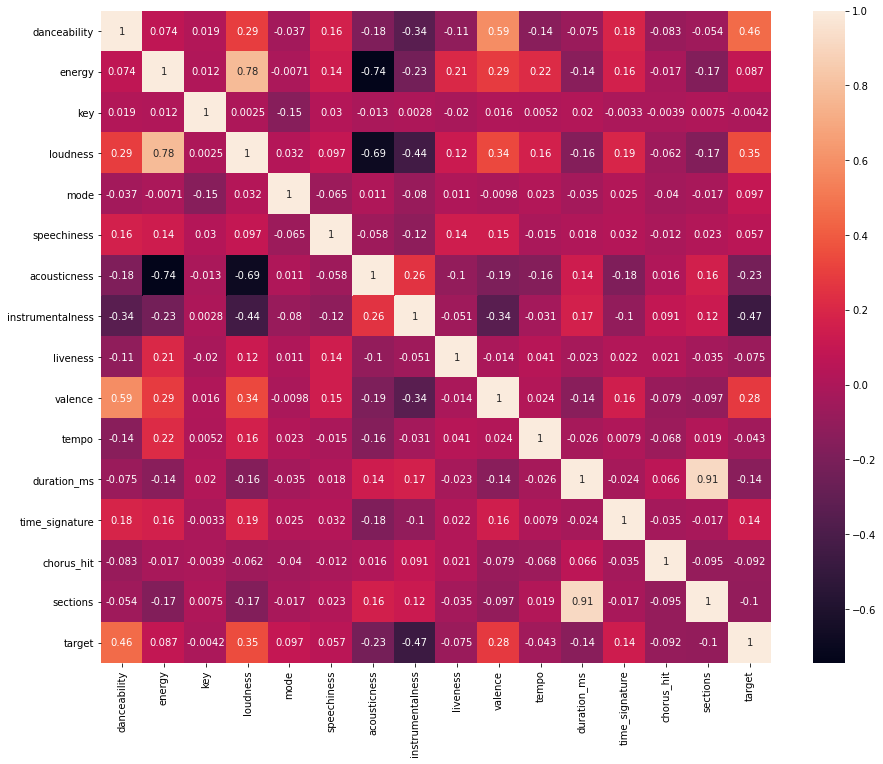

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo